# Regularization Demo
In this notebook, we'll explore different aspects of regularization. We are going to use L1 and L2 regularization in linear regression model. We'll also use support vector regressor for comparison.

First, let us import related packages for this regression and visualization.

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.svm import SVR

from IPython.core.pylabtools import figsize
figsize(18, 6)

## Model and the Noisy data
Now, we generate a test data. The model of this test data is a sine wave. We add small guassian noise, and a few corrupted value with the model data. Our main goal will be come up with a regression model, which will fit the model rater than over fitting with the corrupted data point.

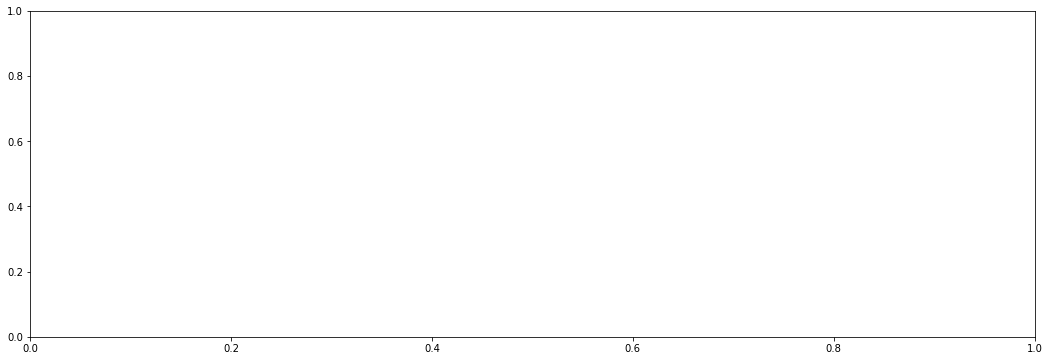

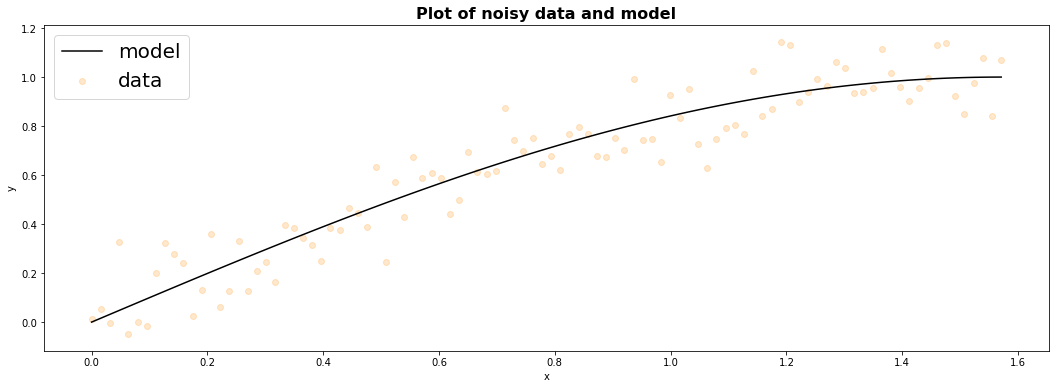

In [122]:
N=100
x=2*np.pi*np.linspace(0,1/4,N)
ymodel=np.sin(x)
y=ymodel+np.random.normal(0,0.1,N)

def plot_data_model(title):
    plt.scatter(x,y,alpha=0.2,color='darkorange',label='data')
    plt.plot(x,ymodel,color='k',label='model')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title, fontweight='bold',fontsize=16)
    plt.legend(prop={'size':20})
    plt.show()

plot_data_model('Plot of noisy data and model')

## Estimation using different model complexity
### Estimation vs Model complexity
Now, we'll create models using different power of the input and build linear model using those models. Higher model number means higher complexity is used for estimation.

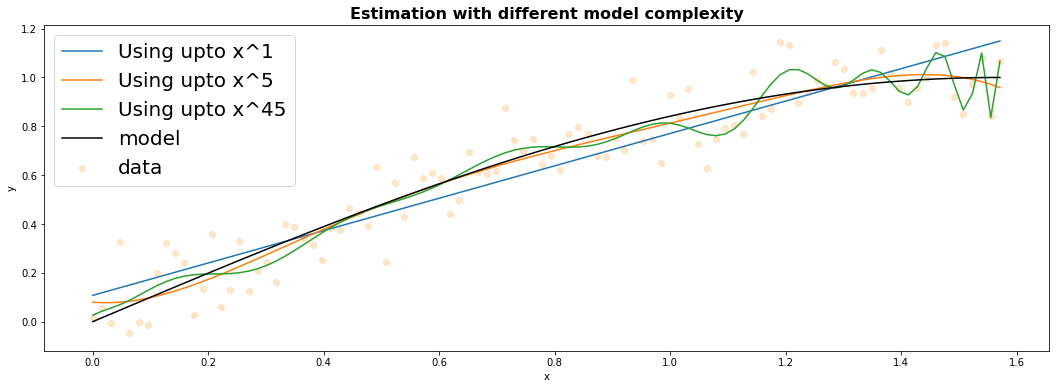

In [123]:
### Linear Regression fiting
model=45
X=np.zeros((N,model))
for i in range(1,model):
    X[:,i-1]=pow(x,i)

error=[]
dev=[]
for i in range(1,model+1):
    model=linear_model.LinearRegression()
    model.fit(X[:,0:i],y)
    yest=model.predict(X[:,0:i])
    error.append(np.mean((y-yest)**2))
    dev.append(np.mean((ymodel-yest)**2))
    if i in [1,5,45]:
        plt.plot(x,yest,label='Using upto x^%d'%i)

plot_data_model('Estimation with different model complexity')

### Deviation from model and noisy data for different model complexity
As we increase model complexity, we see that estmation error from the original data is decreasing, and estimation error from the model values is increasing. This implies that our estimation become overfited with the noisy dataset for higher model complexity.

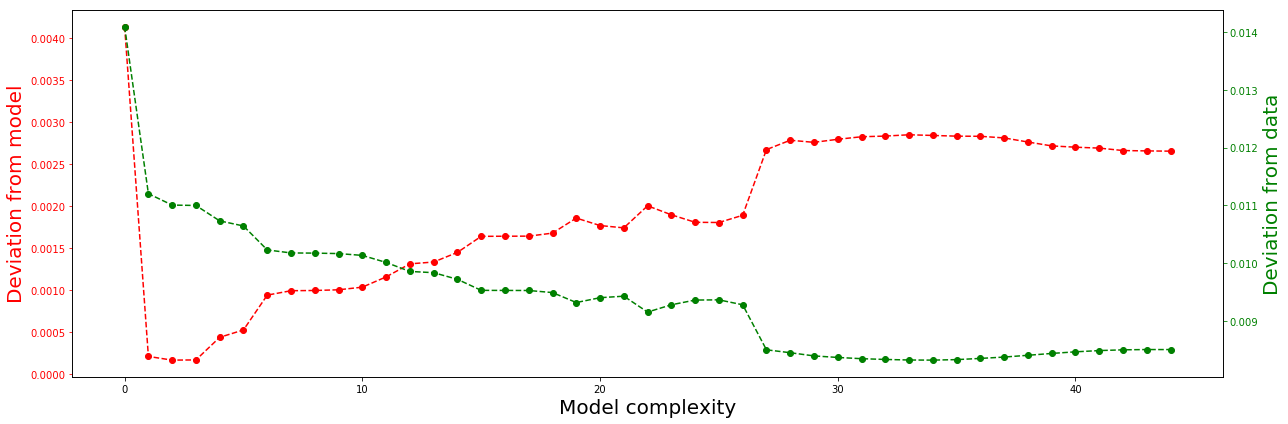

In [124]:
fig, ax1 = plt.subplots()
ax1.plot(dev,'o',ls='--',color='r',label='Model deviation')
ax1.set_ylabel('Deviation from model', color='r', fontsize=20)
ax1.tick_params('y', colors='r')
ax1.set_xlabel('Model complexity',fontsize=20)

ax2 = ax1.twinx()
ax2.plot(error,'o',ls='--',color='g',label='Data deviation')
ax2.set_ylabel('Deviation from data', color='g',fontsize=20)
ax2.tick_params('y', colors='g')
fig.tight_layout()
plt.show()

## Reduce overfiting using regularization
Now, we are going to use L1 and L2 regularization to reduce overfiting of our estimation. We'll use all power of x, which means the highest model complexity is used. Therefore, linear estimation will provide overfiting estimation. The same model complexity is used for estimation with L1 and L2 regularization. We see that L1 and L2 regularization reduce the overfitting effect, and fit the estimation closely to the model rather than noisy data. 

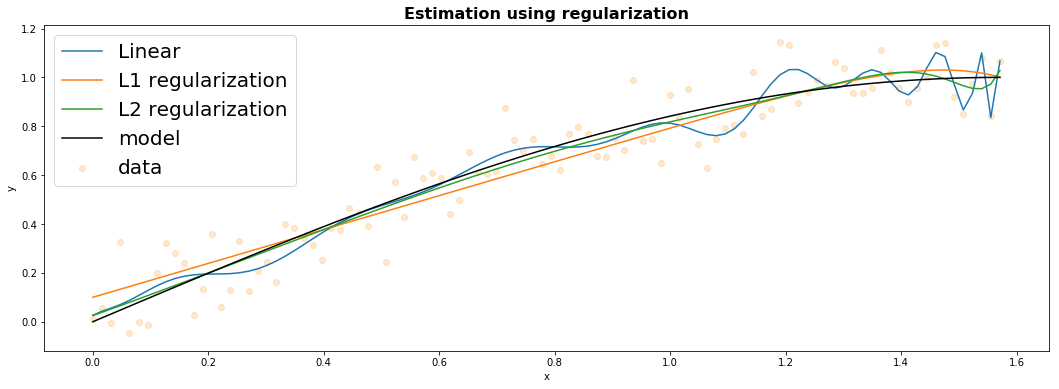

In [125]:
bag_of_regressor=[{'model':linear_model.LinearRegression(),'name':'Linear'},
                  {'model':linear_model.Lasso(max_iter=1e5,normalize=True, alpha=1e-3),'name':'L1 regularization'},
                  {'model':linear_model.Ridge(normalize=True,alpha=1e-3),'name':'L2 regularization'}
                  ]

for regressor in bag_of_regressor:
      model=regressor['model'].fit(X,y)
      yest=model.predict(X)
      plt.plot(x,yest,label=regressor['name'])

plot_data_model('Estimation using regularization')

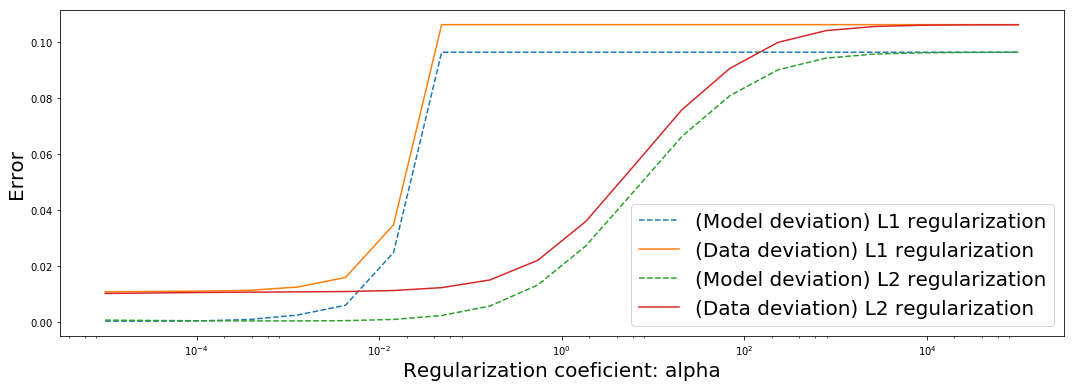

In [126]:
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
plt.figure()

for regressor in bag_of_regressor[1:]:
    dev=[]
    error=[]
    for a in alphas:
        model=regressor['model']
        model.set_params(alpha=a)
        model.fit(X,y)
        yest=model.predict(X)
        dev.append(np.mean((ymodel-yest)**2))
        error.append(np.mean((y-yest)**2))
        
    
    plt.plot(alphas,dev,ls='--',label='(Model deviation) '+regressor['name'])
    plt.plot(alphas,error,label='(Data deviation) '+regressor['name'])
    
plt.xscale('log')
plt.xlabel('Regularization coeficient: alpha', fontsize=20)
plt.ylabel('Error', fontsize=20)
plt.legend(prop={'size':20})
plt.show()

## Deviation from data and model for different alphas

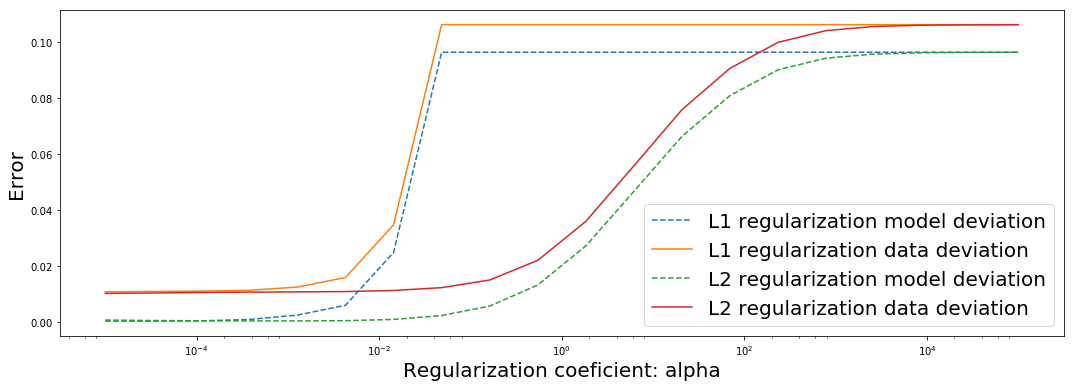

In [127]:
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
plt.figure()

coefs=[]
for regressor in bag_of_regressor[1:]:
    dev=[]
    error=[]
    coef=[]
    for a in alphas:
        model=regressor['model']
        model.set_params(alpha=a)
        model.fit(X,y)
        yest=model.predict(X)
        dev.append(np.mean((ymodel-yest)**2))
        error.append(np.mean((y-yest)**2))
        coef.append(model.coef_)
        
    coefs.append(coef)
    plt.plot(alphas,dev,ls='--',label=regressor['name']+' model deviation')
    plt.plot(alphas,error,label=regressor['name']+ ' data deviation')
    
plt.xscale('log')
plt.xlabel('Regularization coeficient: alpha', fontsize=20)
plt.ylabel('Error', fontsize=20)
plt.legend(prop={'size':20})
plt.show()

## Number of zero coefficient in L1 and L2 regularization

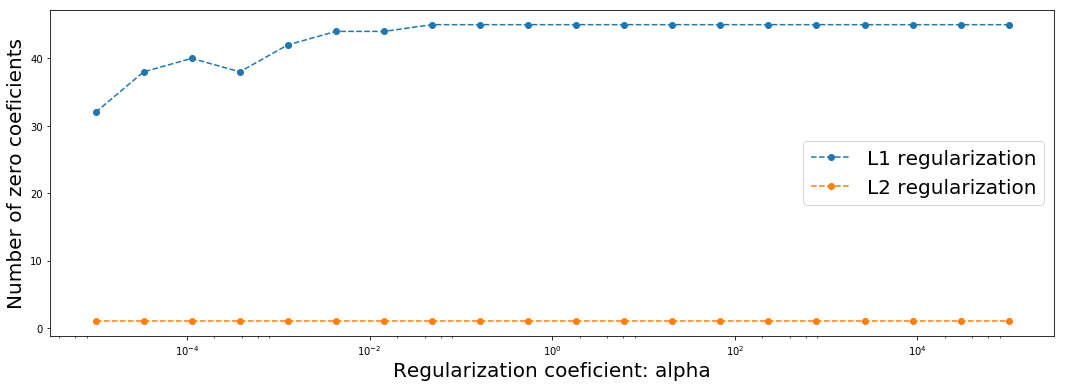

In [134]:
plt.figure()
for c,regressor in zip(coefs,bag_of_regressor[1:]):
    c=np.array(c)
    plt.plot(alphas,np.sum(c==0,axis=1),'o',ls='--',label=regressor['name'])
plt.xscale('log')
plt.xlabel('Regularization coeficient: alpha', fontsize=20)
plt.ylabel('Number of zero coeficients', fontsize=20)
plt.legend(prop={'size':20})
plt.show()

## L1 and L2 regularization coeficients values

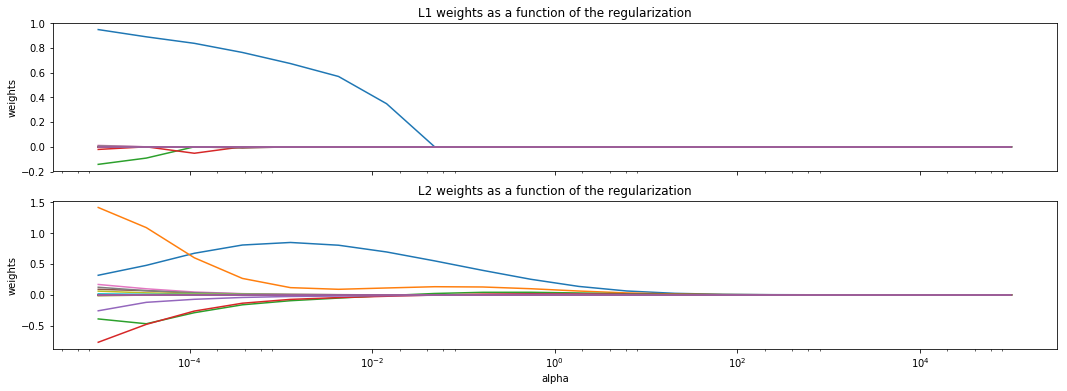

In [136]:
fig,subplot=plt.subplots(2,1,sharex=True)
ax =subplot[0]

ax.plot(alphas,coefs[0])
ax.set_xscale('log')
ax.set_title('L1 weights as a function of the regularization')
ax.set_ylabel('weights')

ax=subplot[1]

ax.plot(alphas,coefs[1])
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('weights')

ax.set_title('L2 weights as a function of the regularization')
plt.axis('tight')
plt.show()